 _Perform Exploratory Data Analysis_ 

## . _Import Libraries_

In [6]:
# Libraries neeeded to work on the data
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pylab as pl
import scipy.stats as stats
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [7]:
import warnings
warnings.filterwarnings('ignore')


# Dataset has 271361 rows, jupyter notebook is crashing 
#if I don't limit the number of rows displayed below.
pd.set_option('display.max_columns', 1000) 
pd.set_option('display.max_rows', 1000)
pd.options.display.max_columns = 1000

## . _Import data_

In [8]:
df1 = pd.read_csv('books_final.csv')

In [9]:
df2 = pd.read_csv('ratings_final.csv')

In [10]:
df3 = pd.read_csv('users_final2.csv')

### _Merge_

In [11]:
data_m = df1.merge(df2,on='isbn')

In [12]:
data = data_m.merge(df3,on='user_id')
data

,Unnamed: 0_x,isbn,book_title,book_author,year_of_publication,publisher,Unnamed: 0_y,Unnamed: 0.1_x,user_id,book_rating,Unnamed: 0,Unnamed: 0.1_y,age,city,region,country
0,0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,9561,9561,2,0,1,1,18,stockton,california,usa
1,1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,9563,9563,8,5,7,7,34,timmins,ontario,canada
2,2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,9564,9564,8,0,7,7,34,timmins,ontario,canada
3,3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,9565,9565,8,0,7,7,34,timmins,ontario,canada
4,4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,9566,9566,8,0,7,7,34,timmins,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031130,271055,087004124X,Anthem,Ayn Rand,1966,Caxton Press,1084954,1084954,259589,8,259588,259588,19,venice,florida,usa
1031131,271056,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,1084955,1084955,259591,8,259590,259590,39,tioga,pennsylvania,usa
1031132,271057,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,1084961,1084961,259614,10,259613,259613,22,madrid,madrid,spain
1031133,271111,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998,American Library Association,1085625,1085625,259679,6,259678,259678,27,grand prairie,texas,usa


### _Check the data_

In [13]:
data.shape

(1031135, 16)

In [14]:
data.dtypes

Unnamed: 0_x            int64
isbn                   object
book_title             object
book_author            object
year_of_publication     int64
publisher              object
Unnamed: 0_y            int64
Unnamed: 0.1_x          int64
user_id                 int64
book_rating             int64
Unnamed: 0              int64
Unnamed: 0.1_y          int64
age                     int64
city                   object
region                 object
country                object
dtype: object

In [15]:
data.info

<bound method DataFrame.info of          Unnamed: 0_x        isbn  \
0                   0  0195153448   
1                   1  0002005018   
2                   2  0060973129   
3                   3  0374157065   
4                   4  0393045218   
...               ...         ...   
1031130        271055  087004124X   
1031131        271056  158243123X   
1031132        271057  8485900057   
1031133        271111  0838934854   
1031134        271184  3423300965   

                                                book_title  \
0                                      Classical Mythology   
1                                             Clara Callan   
2                                     Decision in Normandy   
3        Flu: The Story of the Great Influenza Pandemic...   
4                                   The Mummies of Urumchi   
...                                                    ...   
1031130                                             Anthem   
1031131                    

In [16]:
data.columns

Index(['Unnamed: 0_x', 'isbn', 'book_title', 'book_author',
       'year_of_publication', 'publisher', 'Unnamed: 0_y', 'Unnamed: 0.1_x',
       'user_id', 'book_rating', 'Unnamed: 0', 'Unnamed: 0.1_y', 'age', 'city',
       'region', 'country'],
      dtype='object')

### _Drop columns_

In [17]:
data = data.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0' , 'Unnamed: 0.1'],axis=1)

KeyError: "['Unnamed: 0.1'] not found in axis"

In [18]:
#data

### _Save_

Saving this preprocessed dataset so we can use it in MYSQL ...

In [19]:
data.to_csv(r'C:\Users\ASUS\Data Analytics\Projects\Recommended-Reading\Working\preprocessed_data.csv')

## . _Data exploring_

In [20]:
pd.set_option('max_row', None) # to get all the column
data.dtypes

Unnamed: 0_x            int64
isbn                   object
book_title             object
book_author            object
year_of_publication     int64
publisher              object
Unnamed: 0_y            int64
Unnamed: 0.1_x          int64
user_id                 int64
book_rating             int64
Unnamed: 0              int64
Unnamed: 0.1_y          int64
age                     int64
city                   object
region                 object
country                object
dtype: object

In [21]:
pd.set_option('max_row', 1000)
data.columns

Index(['Unnamed: 0_x', 'isbn', 'book_title', 'book_author',
       'year_of_publication', 'publisher', 'Unnamed: 0_y', 'Unnamed: 0.1_x',
       'user_id', 'book_rating', 'Unnamed: 0', 'Unnamed: 0.1_y', 'age', 'city',
       'region', 'country'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031135 entries, 0 to 1031134
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Unnamed: 0_x         1031135 non-null  int64 
 1   isbn                 1031135 non-null  object
 2   book_title           1031135 non-null  object
 3   book_author          1031135 non-null  object
 4   year_of_publication  1031135 non-null  int64 
 5   publisher            1031135 non-null  object
 6   Unnamed: 0_y         1031135 non-null  int64 
 7   Unnamed: 0.1_x       1031135 non-null  int64 
 8   user_id              1031135 non-null  int64 
 9   book_rating          1031135 non-null  int64 
 10  Unnamed: 0           1031135 non-null  int64 
 11  Unnamed: 0.1_y       1031135 non-null  int64 
 12  age                  1031135 non-null  int64 
 13  city                 1017033 non-null  object
 14  region               1030399 non-null  object
 15  country        

In [23]:
data.isna().sum()

Unnamed: 0_x               0
isbn                       0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
Unnamed: 0_y               0
Unnamed: 0.1_x             0
user_id                    0
book_rating                0
Unnamed: 0                 0
Unnamed: 0.1_y             0
age                        0
city                   14102
region                   736
country                24374
dtype: int64

In [24]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts(), '\n')

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
              ... 
0817304991       1
0853301239       1
0373763239       1
0394562798       1
0449183297       1
Name: isbn, Length: 270150, dtype: int64 

Wild Animus                                              2502
The Lovely Bones: A Novel                                1295
The Da Vinci Code                                         898
A Painted House                                           838
The Nanny Diaries: A Novel                                828
                                                         ... 
El espejo enterrado                                         1
The space shuttle handbook                                  1
Word Watch: The Stories Behind the Words of Our Lives       1
Puss in Boots (Little Golden Book)                          1
Mysterious Australia                                        1
Name: book_title, Length: 241070, dtype: int64 

Stephen King     

In [25]:
print(data['isbn'].unique())

['0195153448' '0002005018' '0060973129' ... '8485900057' '0838934854'
 '3423300965']


In [26]:
print(data.groupby('book_rating').size())

book_rating
0     647294
1       1481
2       2375
3       5118
4       7617
5      45355
6      31687
7      66402
8      91803
9      60778
10     71225
dtype: int64


In [27]:
print(data.groupby('age').size())

age
5        159
6         14
7        148
8        542
9       2056
10       227
11       513
12       747
13      1243
14      3206
15      3165
16      3299
17      5282
18      8747
19      5247
20      6487
21     10062
22     12101
23     18793
24     18572
25     21768
26     22106
27     22280
28     25966
29     30646
30     27201
31     25964
32     26490
33     32862
34    308707
35     19573
36     26096
37     21116
38     22396
39     17002
40     15521
41     15900
42     10759
43     20612
44     21510
45     11792
46     16345
47     18517
48      7666
49     14345
50      9451
51     14033
52     17637
53      6881
54     10106
55      6029
56      8337
57      8918
58      8850
59      2913
60      3646
61      4201
62      8382
63      3055
64      1077
65      3949
66      1242
67      2801
68       737
69      1225
70       510
71       796
72       456
73       276
74       238
75       204
76       253
77       148
78       125
79       141
80       184
81      

In [28]:
#data.drop('offer_accepted' ,axis=1).hist(bins=30, figsize=(9,9))
#pl.suptitle("Histogram for each numeric input variable")
#plt.savefig('average_balance')
#plt.show()

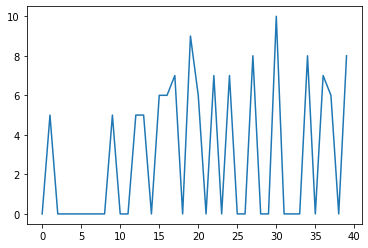

In [32]:
new_ratings_data = data['book_rating'][0:40].interpolate(method='linear')

new_ratings_data.plot()
plt.show()

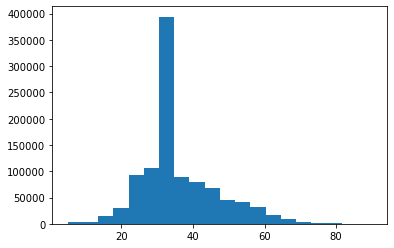

In [33]:
plt.hist(data['age'].interpolate(method='polynomial', order=2), bins=20) 
plt.show()

In [41]:
data = data.astype({"book_rating": str})

TypeError: 'value' must be an instance of str or bytes, not a numpy.float64

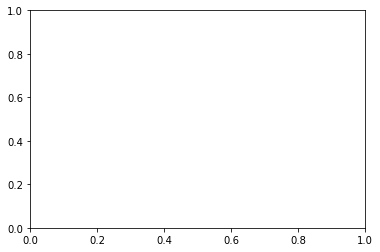

In [42]:
plt.hist(data['country'].fillna(data['book_rating'].mean()), bins=20)
plt.show()

In [ ]:
corr_matrix=data.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(corr_matrix, annot=True)
#plt.show()

In [ ]:
#for col in data.select_dtypes(np.number):
#    sns.distplot(data[col])
#    plt.show()

In [ ]:
data.drop(['MyUnknownColumn'], axis=1, inplace=True)

In [ ]:
num = data.select_dtypes('number')
for c in num.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.set_style("darkgrid")
    sns.distplot(num[c], ax=axes[0],  color = 'gray')
    sns.boxplot(num[c], ax=axes[1],  color = 'gray')
    #plt.show()

In [ ]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [ ]:
data = pd.get_dummies(data, drop_first=True) 


### _KMEANS_

In [ ]:
import pandas as pd
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
# y = pd.Series(data["target"])

X.head()

In [ ]:
# K-Means is a distance based algorithm: we need to scale / normalize:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

pd.DataFrame(X_prep).head()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_prep)

In [ ]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)
clusters

In [ ]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

In [ ]:
# Explore the cluster assignment in the original dataset
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()

X_df['cluster'] = X_df['cluster'].apply(lambda x: 0 if x == 1 else 1 if x == 2 else 2)
X_df

In [ ]:
# Class Weigh

### . _Choosing the best value of k for the KNN_

In [144]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

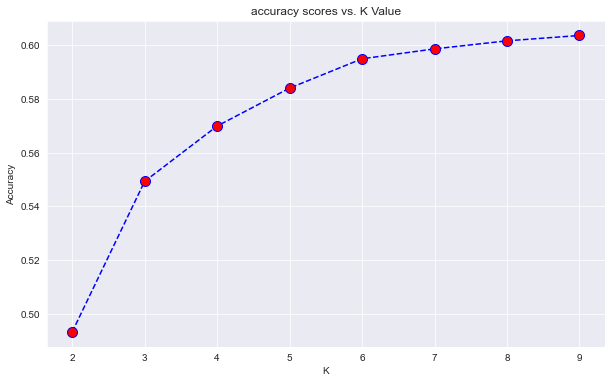

In [145]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

### . _Measures of accuracies for regression models_

In [146]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, predictions)
score

194.750812033821

In [147]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y_test, predictions)
score

67841.48765657935

In [148]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
rmse

260.46398533497745

### . _R-squared value_

In [150]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
score

0.45378463851113215

In [153]:
score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
score

0.4479695440778191

In [156]:
rmse = math.sqrt(mse)
print(rmse)

260.46398533497745


In [157]:
r2 = r2_score(y_test, predictions)
print(r2)

0.45378463851113215


In [158]:
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print(adj_r2)

0.45185311201414946
